---

## **🚀 Projeto - Desempenho Acadêmico**

### **Pergunta Norteadora**:  
**"Quais fatores demográficos, acadêmicos e comportamentais mais influenciam a classificação e a média de notas dos estudantes?"**

A variável de interesse é **`Classificacao_Notas`**. Investigar como elas se relacionam com outros fatores, como idade, gênero, faltas, horas de estudo e participação em atividades extracurriculares.

---

## Passos do Projeto ##

Passo 1 - Importar o DataFrame

Passo 2 - Visualizar o DataFrame

Passo 3 - Corrigir erros no DataFrame

Passo 4 - Analisar o desempenho acadêmico

Passo 5 - Analisar as variáveis que influenciam no desempenho acadêmico

Passo 6 - Fazer uma análise preditiva para melhorar o desempenho acadêmico, caso seja necessário

---


Passo 1 - Importar o DataFrame

---

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset
df_dados_estudantes = pd.read_csv("dados_estudantes.csv", sep= ',')

# Verificando as primeiras linhas do dataset
display(df_dados_estudantes)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [2]:
traducao_colunas = {
    "StudentID": "ID_Aluno",
    "Age": "Idade",
    "Gender": "Genero",
    "Ethnicity": "Etnia",
    "ParentalEducation": "Escolaridade_Pais",
    "StudyTimeWeekly": "Horas_Estudo_Semanais",
    "Absences": "Faltas",
    "Tutoring": "Aulas_Particulares",
    "ParentalSupport": "Apoio_Pais",
    "Extracurricular": "Atividades_Extracurriculares",
    "Sports": "Esportes",
    "Music": "Musica",
    "Volunteering": "Voluntariado",
    "GPA": "Media_Notas",
    "GradeClass": "Classificacao_Notas"
}

# Renomear as colunas
df_dados_estudantes = df_dados_estudantes.rename(columns=traducao_colunas)

df_dados_estudantes.head()


,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


---

Passo 2 - Visualizar o DataFrame

---

In [3]:
# Usando shape para conferir as dimensões do dataframe
df_dados_estudantes.shape

(2392, 15)

In [4]:
# Conferindo os tipos de dados utilizados no dataframe com dtypes
df_dados_estudantes.dtypes

ID_Aluno                          int64
Idade                             int64
Genero                            int64
Etnia                             int64
Escolaridade_Pais                 int64
Horas_Estudo_Semanais           float64
Faltas                            int64
Aulas_Particulares                int64
Apoio_Pais                        int64
Atividades_Extracurriculares      int64
Esportes                          int64
Musica                            int64
Voluntariado                      int64
Media_Notas                     float64
Classificacao_Notas             float64
dtype: object

In [5]:
# Visualizando as informaçoes do dataframe com info
df_dados_estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_Aluno                      2392 non-null   int64  
 1   Idade                         2392 non-null   int64  
 2   Genero                        2392 non-null   int64  
 3   Etnia                         2392 non-null   int64  
 4   Escolaridade_Pais             2392 non-null   int64  
 5   Horas_Estudo_Semanais         2392 non-null   float64
 6   Faltas                        2392 non-null   int64  
 7   Aulas_Particulares            2392 non-null   int64  
 8   Apoio_Pais                    2392 non-null   int64  
 9   Atividades_Extracurriculares  2392 non-null   int64  
 10  Esportes                      2392 non-null   int64  
 11  Musica                        2392 non-null   int64  
 12  Voluntariado                  2392 non-null   int64  
 13  Med

In [6]:
# Conferir se existe valores ausentes no dataframe
df_dados_estudantes.isna().sum()

ID_Aluno                        0
Idade                           0
Genero                          0
Etnia                           0
Escolaridade_Pais               0
Horas_Estudo_Semanais           0
Faltas                          0
Aulas_Particulares              0
Apoio_Pais                      0
Atividades_Extracurriculares    0
Esportes                        0
Musica                          0
Voluntariado                    0
Media_Notas                     0
Classificacao_Notas             0
dtype: int64

In [7]:
# Por fim fazer uma análise descritiva do dataframe
df_dados_estudantes.describe()

,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


---

Passo 3 - Corrigir erros no DataFrame e remodelar os dados

---

Para seguir os padrões apresentados na Descrição das Colunas do DataFrame, irei alterar o tipo de dados de algumas colunas, seguindo o padrão descrito abaixo:

## **📊 Descrição das Colunas do DataFrame**

### **Identificação do Estudante**  
- **ID_Aluno**: Identificador único para cada aluno (de 1001 a 3392).

### **👥 Detalhes Demográficos**  
- **Idade**: Idade dos estudantes, variando de 15 a 18 anos.  
- **Genero**: Gênero do estudante:
  - 0: Masculino
  - 1: Feminino  
- **Etnia**: Etnia dos estudantes:
  - 0: Caucasiano
  - 1: Afrodescendente
  - 2: Asiático
  - 3: Outra

### **👨‍👩‍👧 Educação dos Pais**  
- **Escolaridade_Pais**: Nível de escolaridade dos pais:
  - 0: Nenhum
  - 1: Ensino Médio
  - 2: Alguma Faculdade
  - 3: Graduação
  - 4: Pós-Graduação ou Superior

### **📚 Hábitos de Estudo**  
- **Horas_Estudo_Semanais**: Tempo de estudo semanal em horas (0 a 20).  
- **Faltas**: Número de faltas no ano letivo (0 a 30).  
- **Aulas_Particulares**: Participação em aulas particulares:
  - 0: Não
  - 1: Sim

### **👨‍👩‍👧 Envolvimento Parental**  
- **Apoio_Pais**: Nível de apoio dos pais:
  - 0: Nenhum
  - 1: Baixo
  - 2: Moderado
  - 3: Alto
  - 4: Muito Alto

### **🏫 Atividades Extracurriculares**  
- **Atividades_Extracurriculares**: Participação em atividades extracurriculares:
  - 0: Não
  - 1: Sim  
- **Esportes**: Participação em esportes:
  - 0: Não
  - 1: Sim  
- **Musica**: Participação em atividades musicais:
  - 0: Não
  - 1: Sim  
- **Voluntariado**: Participação em atividades de voluntariado:
  - 0: Não
  - 1: Sim

### **📈 Desempenho Acadêmico**  
- **Media_Notas**: Média das notas (GPA), variando de 2.0 a 4.0.  
- **Classificacao_Notas**: Classificação do aluno com base na média das notas:
  - 0: 'A' (Média >= 3.5)
  - 1: 'B' (3.0 <= Média < 3.5)
  - 2: 'C' (2.5 <= Média < 3.0)
  - 3: 'D' (2.0 <= Média < 2.5)
  - 4: 'F' (Média < 2.0)

---

In [8]:
# Alterando a coluna Media_Notas para float com 1 casa decimal
df_dados_estudantes[["Media_Notas"]] = df_dados_estudantes[["Media_Notas"]].astype(float).round(1)


In [9]:
# Alterando as colunas Horas_Estudo_Semanais e Classificacao_Notas para Int
df_dados_estudantes[["Horas_Estudo_Semanais", 
                     "Classificacao_Notas"]] = df_dados_estudantes[["Horas_Estudo_Semanais", 
                                                                    "Classificacao_Notas"]].astype(int)

# Visualizando a alteração das 3 colunas
df_dados_estudantes.dtypes

ID_Aluno                          int64
Idade                             int64
Genero                            int64
Etnia                             int64
Escolaridade_Pais                 int64
Horas_Estudo_Semanais             int64
Faltas                            int64
Aulas_Particulares                int64
Apoio_Pais                        int64
Atividades_Extracurriculares      int64
Esportes                          int64
Musica                            int64
Voluntariado                      int64
Media_Notas                     float64
Classificacao_Notas               int64
dtype: object

In [10]:
# Visualizando o dataframe após as alterações
df_dados_estudantes.head()

,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
0,1001,17,1,0,2,19,7,1,2,0,0,1,0,2.9,2
1,1002,18,0,0,1,15,0,0,1,0,0,0,0,3.0,1
2,1003,15,0,2,3,4,26,0,2,0,0,0,0,0.1,4
3,1004,17,1,0,3,10,14,0,3,1,0,0,0,2.1,3
4,1005,17,1,0,2,4,17,1,3,0,0,0,0,1.3,4


In [11]:
# O ID_Aluno está sendo contando de 1001 à 3392, para alterar a contagem para 1 à 2392 usarei o método apply lambda para 
# fazer essa alteração.

# Alterando os valores do ID_Aluno para contar do número 1 em diante
df_dados_estudantes["ID_Aluno"] = df_dados_estudantes["ID_Aluno"].apply(lambda x: x - 1000)
     

In [12]:
# Para alterar os valores numéricos pelos seus respectivos valores informados na descrição, usarei o método replace 
# para reverter os números cadastrados em seus devidos valores informados.

# Alterando os valores da descrição da coluna Gênero
df_dados_estudantes["Genero"] = df_dados_estudantes["Genero"].replace({
     0: "Masculino", 
     1: "Feminino"
})


In [13]:
# Alterando os valores da descrição da coluna Etnia
df_dados_estudantes["Etnia"] = df_dados_estudantes["Etnia"].replace({
    0: "Caucasiano", 
    1: "Afrodescendente", 
    2: "Asiático", 
    3: "Outra"
})


In [14]:
# Alterando os valores da descrição da coluna Escolaridade dos Pais
df_dados_estudantes["Escolaridade_Pais"] = df_dados_estudantes["Escolaridade_Pais"].replace({
     0: "Nenhum", 
     1: "Ensino Médio", 
     2: "Alguma Faculdade", 
     3: "Graduação", 
     4: "Pós-Graduação ou Superior"
})


In [15]:
# Alterando os valores da descrição da coluna Aulas Particulares
df_dados_estudantes["Aulas_Particulares"] = df_dados_estudantes["Aulas_Particulares"].replace({
    0: "Não", 
    1: "Sim"
})


In [16]:
# Alterando os valores da descrição da coluna Apoio dos Pais
df_dados_estudantes["Apoio_Pais"] = df_dados_estudantes["Apoio_Pais"].replace({
    0: "Nenhum", 
    1: "Baixo", 
    2: "Moderado", 
    3: "Alto", 
    4: "Muito Alto"
})


In [17]:
# Alterando os valores da descrição da coluna Atividades Extracurriculares
df_dados_estudantes["Atividades_Extracurriculares"] = df_dados_estudantes["Atividades_Extracurriculares"].replace({
    0: "Não",
    1: "Sim"
})

In [18]:
# Alterando os valores da descrição da coluna Esportes
df_dados_estudantes["Esportes"] = df_dados_estudantes["Esportes"].replace({
     0: "Não", 
     1: "Sim"
})


In [19]:
# Alterando os valores da descrição da coluna Musica
df_dados_estudantes["Musica"] = df_dados_estudantes["Musica"].replace({
    0: "Não", 
    1: "Sim"
})


In [20]:
# Alterando os valores da descrição da coluna Voluntariado
df_dados_estudantes["Voluntariado"] = df_dados_estudantes["Voluntariado"].replace({
    0: "Não", 
    1: "Sim"
})


In [21]:
# Alterando os valores da descrição da coluna Classificacao_Notas
df_dados_estudantes["Classificacao_Notas"] = df_dados_estudantes["Classificacao_Notas"].replace({
    0: "A", 
    1: "B", 
    2: "C", 
    3: "D", 
    4: "F"
})

In [22]:
# Com a alteração de todos os valores necessários para suas devidas descrições, é hora de visualizar o resultado em 
# um novo dataframe.

#Visualização do novo dataframe após a alteração das descrições das colunas
novo_df_estudantes = df_dados_estudantes

display(novo_df_estudantes)


,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
0,1,17,Feminino,Caucasiano,Alguma Faculdade,19,7,Sim,Moderado,Não,Não,Sim,Não,2.9,C
1,2,18,Masculino,Caucasiano,Ensino Médio,15,0,Não,Baixo,Não,Não,Não,Não,3.0,B
2,3,15,Masculino,Asiático,Graduação,4,26,Não,Moderado,Não,Não,Não,Não,0.1,F
3,4,17,Feminino,Caucasiano,Graduação,10,14,Não,Alto,Sim,Não,Não,Não,2.1,D
4,5,17,Feminino,Caucasiano,Alguma Faculdade,4,17,Sim,Alto,Não,Não,Não,Não,1.3,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2388,18,Feminino,Caucasiano,Graduação,10,2,Não,Muito Alto,Sim,Não,Não,Não,3.5,A
2388,2389,17,Masculino,Caucasiano,Ensino Médio,7,4,Sim,Muito Alto,Não,Sim,Não,Não,3.3,F
2389,2390,16,Feminino,Caucasiano,Alguma Faculdade,6,20,Não,Moderado,Não,Não,Não,Sim,1.1,C
2390,2391,16,Feminino,Afrodescendente,Nenhum,12,17,Não,Moderado,Não,Sim,Sim,Não,1.8,B


Ao analisar o novo DataFrame, observei que existem inconsistências nos valores em relação a coluna Media_Notas e Classificacao_Notas. Para corrigir esse problema e não haver divergências entre as análises, irei corrigir os valores usando o método apply com lambda de acordo com as informações descritas na Descrição do Desempenho Acadêmico.

In [23]:
# Aplicando o lambda para corrigir os valores da Classificacao_Notas em relação a Média_Notas
novo_df_estudantes["Classificacao_Notas_Lambda"] = novo_df_estudantes["Media_Notas"].apply(lambda x: 
                                                                                           "A" if x >= 3.5 else 
                                                                                           "B" if x >= 3.0 else 
                                                                                           "C" if x >= 2.5 else 
                                                                                           "D" if x >= 2.0 else 
                                                                                           "F")

display(novo_df_estudantes)

,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas,Classificacao_Notas_Lambda
0,1,17,Feminino,Caucasiano,Alguma Faculdade,19,7,Sim,Moderado,Não,Não,Sim,Não,2.9,C,C
1,2,18,Masculino,Caucasiano,Ensino Médio,15,0,Não,Baixo,Não,Não,Não,Não,3.0,B,B
2,3,15,Masculino,Asiático,Graduação,4,26,Não,Moderado,Não,Não,Não,Não,0.1,F,F
3,4,17,Feminino,Caucasiano,Graduação,10,14,Não,Alto,Sim,Não,Não,Não,2.1,D,D
4,5,17,Feminino,Caucasiano,Alguma Faculdade,4,17,Sim,Alto,Não,Não,Não,Não,1.3,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2388,18,Feminino,Caucasiano,Graduação,10,2,Não,Muito Alto,Sim,Não,Não,Não,3.5,A,A
2388,2389,17,Masculino,Caucasiano,Ensino Médio,7,4,Sim,Muito Alto,Não,Sim,Não,Não,3.3,F,B
2389,2390,16,Feminino,Caucasiano,Alguma Faculdade,6,20,Não,Moderado,Não,Não,Não,Sim,1.1,C,F
2390,2391,16,Feminino,Afrodescendente,Nenhum,12,17,Não,Moderado,Não,Sim,Sim,Não,1.8,B,F


Como eu havia notado, os valores estavam divergentes. Isso pode ser observado no dataframe comparando-se os valores entre Classificacao_Notas e Classificacao_Notas_Lambda que eu criei.

In [24]:
# Exluindo a coluna Classificacao_Notas (com os valores errados)
novo_df_estudantes = novo_df_estudantes.drop(columns=["Classificacao_Notas"])

novo_df_estudantes.head()

,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas_Lambda
0,1,17,Feminino,Caucasiano,Alguma Faculdade,19,7,Sim,Moderado,Não,Não,Sim,Não,2.9,C
1,2,18,Masculino,Caucasiano,Ensino Médio,15,0,Não,Baixo,Não,Não,Não,Não,3.0,B
2,3,15,Masculino,Asiático,Graduação,4,26,Não,Moderado,Não,Não,Não,Não,0.1,F
3,4,17,Feminino,Caucasiano,Graduação,10,14,Não,Alto,Sim,Não,Não,Não,2.1,D
4,5,17,Feminino,Caucasiano,Alguma Faculdade,4,17,Sim,Alto,Não,Não,Não,Não,1.3,F


In [25]:
# Renomeando a coluna Classificacao_Notas_Lambda para o nome original Classificacao_Notas
novo_df_estudantes = novo_df_estudantes.rename(columns={"Classificacao_Notas_Lambda": "Classificacao_Notas"})

novo_df_estudantes.head()

,ID_Aluno,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
0,1,17,Feminino,Caucasiano,Alguma Faculdade,19,7,Sim,Moderado,Não,Não,Sim,Não,2.9,C
1,2,18,Masculino,Caucasiano,Ensino Médio,15,0,Não,Baixo,Não,Não,Não,Não,3.0,B
2,3,15,Masculino,Asiático,Graduação,4,26,Não,Moderado,Não,Não,Não,Não,0.1,F
3,4,17,Feminino,Caucasiano,Graduação,10,14,Não,Alto,Sim,Não,Não,Não,2.1,D
4,5,17,Feminino,Caucasiano,Alguma Faculdade,4,17,Sim,Alto,Não,Não,Não,Não,1.3,F


Agora que todas as colunas e seus valores foram remodelados e corrigidos, temos uma visão melhorada e precisa das informações. 

É hora de extrair os insights.

---

Passo 4 - Análise dos dados

---

In [26]:
# Análise exploratória inicial da classificação das notas

# Contagem das notas da classificação
display(novo_df_estudantes["Classificacao_Notas"].value_counts())

# Proporção das classificações
display(novo_df_estudantes["Classificacao_Notas"].value_counts(normalize=True).map("{:.1%}".format))

Classificacao_Notas
F    1239
D     409
C     387
B     258
A      99
Name: count, dtype: int64

Classificacao_Notas
F    51.8%
D    17.1%
C    16.2%
B    10.8%
A     4.1%
Name: proportion, dtype: object

---

De acordo com a análise exploratória, observa-se que o desempenho dos estudantes é considerado sofrível, com 51.8% dos alunos classificados com a nota F e apenas 4.1% atingiram a nota A.

---

Passo 5 - Análise e visualização das variáveis que influenciam no desempenho acadêmico

---

In [27]:
# Configuração da ordem da categoria Classificação das Notas, que nos gráficos são mostrados fora da ordem de A à F. 

# Variável para ajustar o parâmetro categories no historgrama
ordem_categoria = ["A", "B", "C", "D", "F"]

# Ordenando a coluna Classificaçao_Notas
novo_df_estudantes['Classificacao_Notas'] = pd.Categorical(novo_df_estudantes['Classificacao_Notas'], categories=ordem_categoria, ordered=True)


In [28]:
# Excluir campo ID_Aluno que é desnessário para a visualização dos dados
novo_df_estudantes = novo_df_estudantes.drop(columns="ID_Aluno")

novo_df_estudantes.head()

,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
0,17,Feminino,Caucasiano,Alguma Faculdade,19,7,Sim,Moderado,Não,Não,Sim,Não,2.9,C
1,18,Masculino,Caucasiano,Ensino Médio,15,0,Não,Baixo,Não,Não,Não,Não,3.0,B
2,15,Masculino,Asiático,Graduação,4,26,Não,Moderado,Não,Não,Não,Não,0.1,F
3,17,Feminino,Caucasiano,Graduação,10,14,Não,Alto,Sim,Não,Não,Não,2.1,D
4,17,Feminino,Caucasiano,Alguma Faculdade,4,17,Sim,Alto,Não,Não,Não,Não,1.3,F


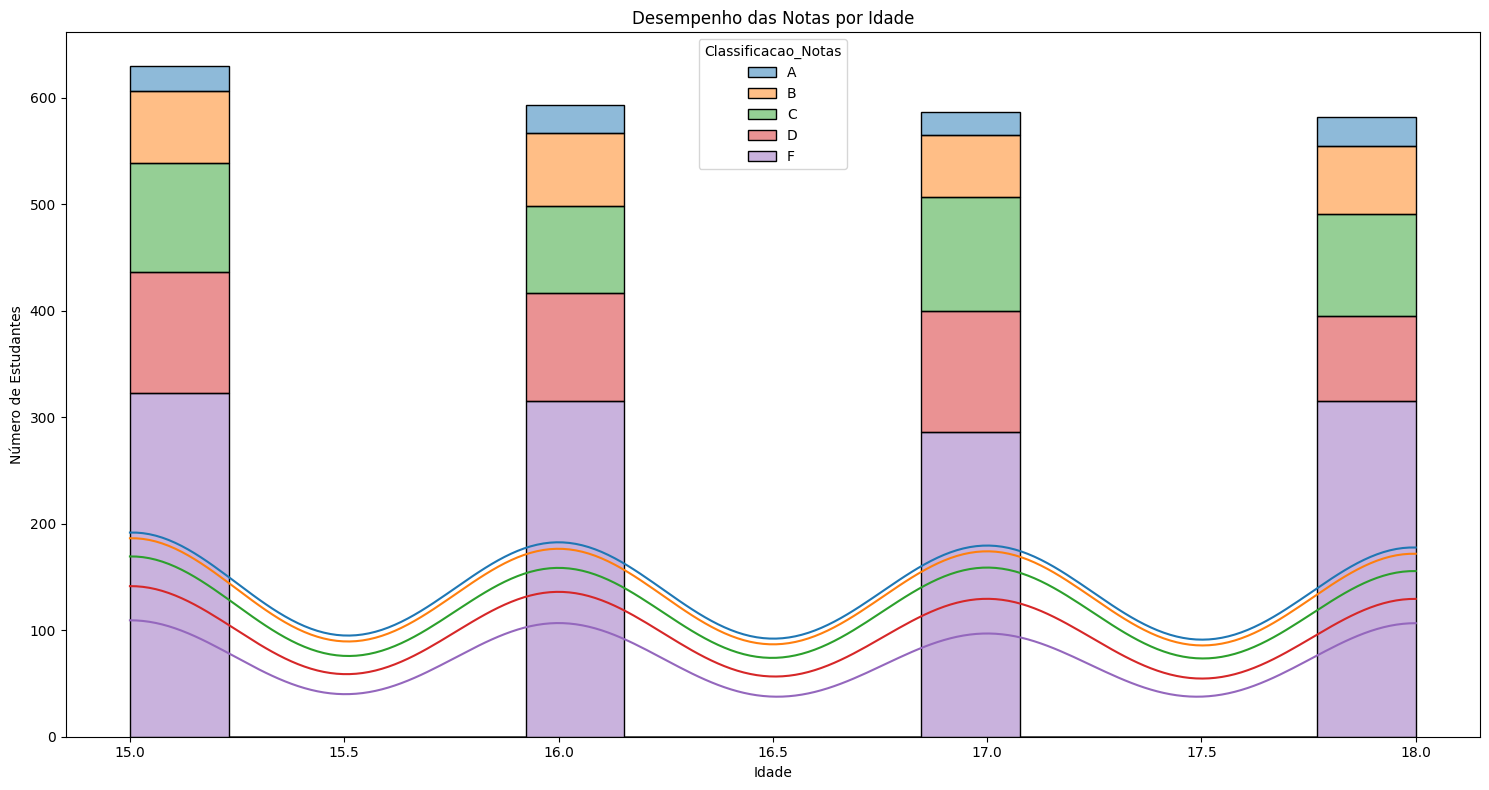

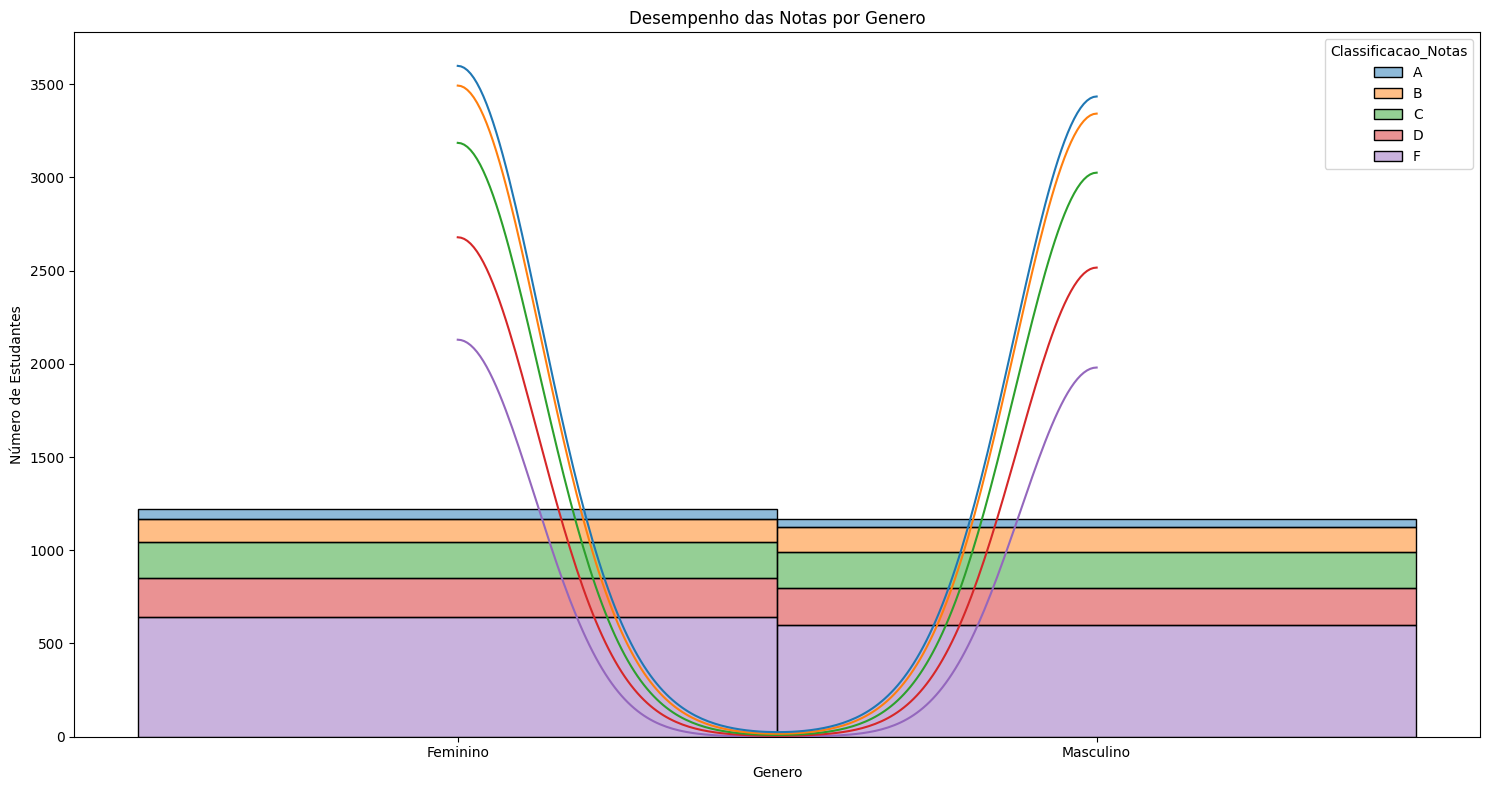

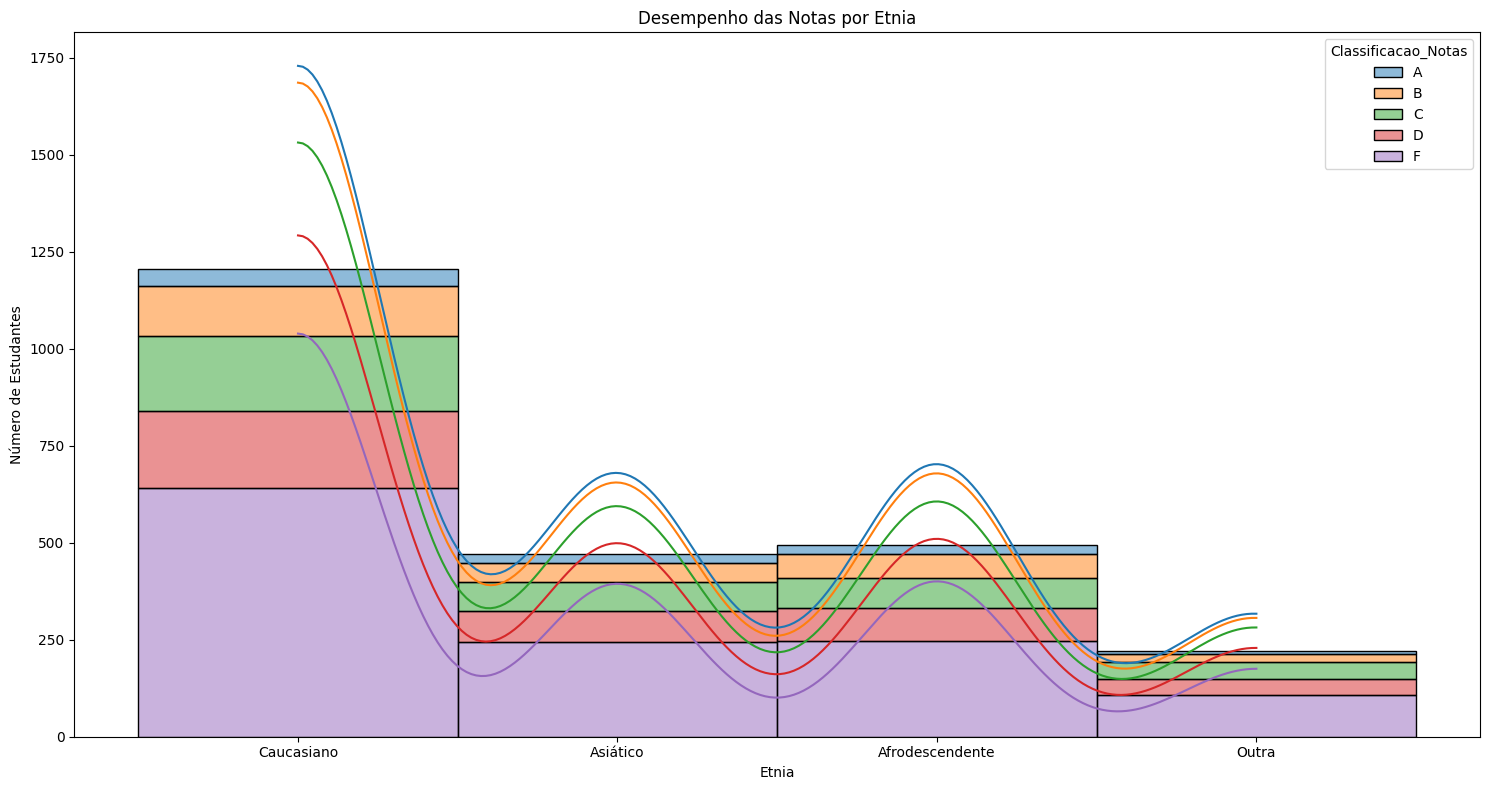

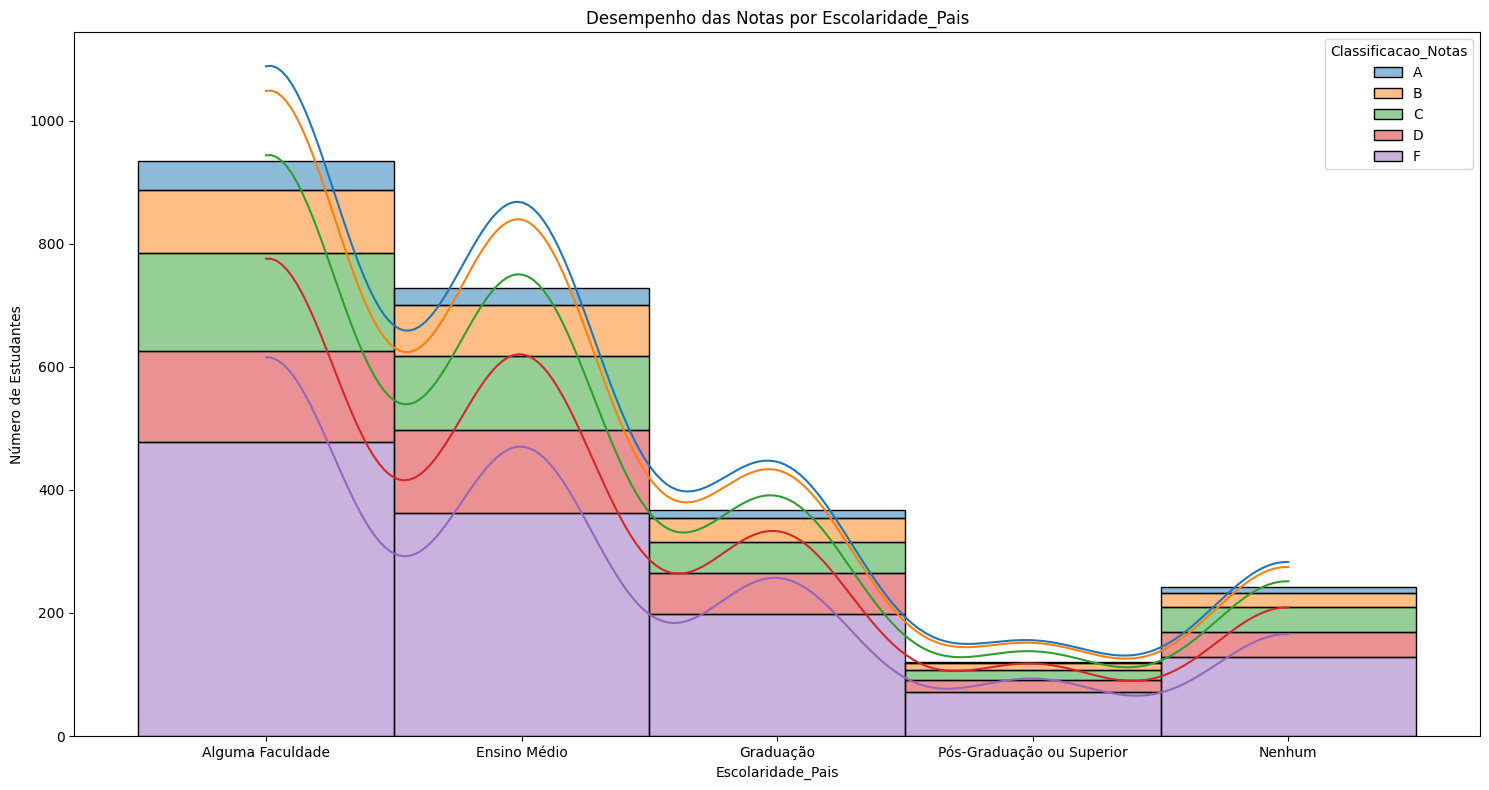

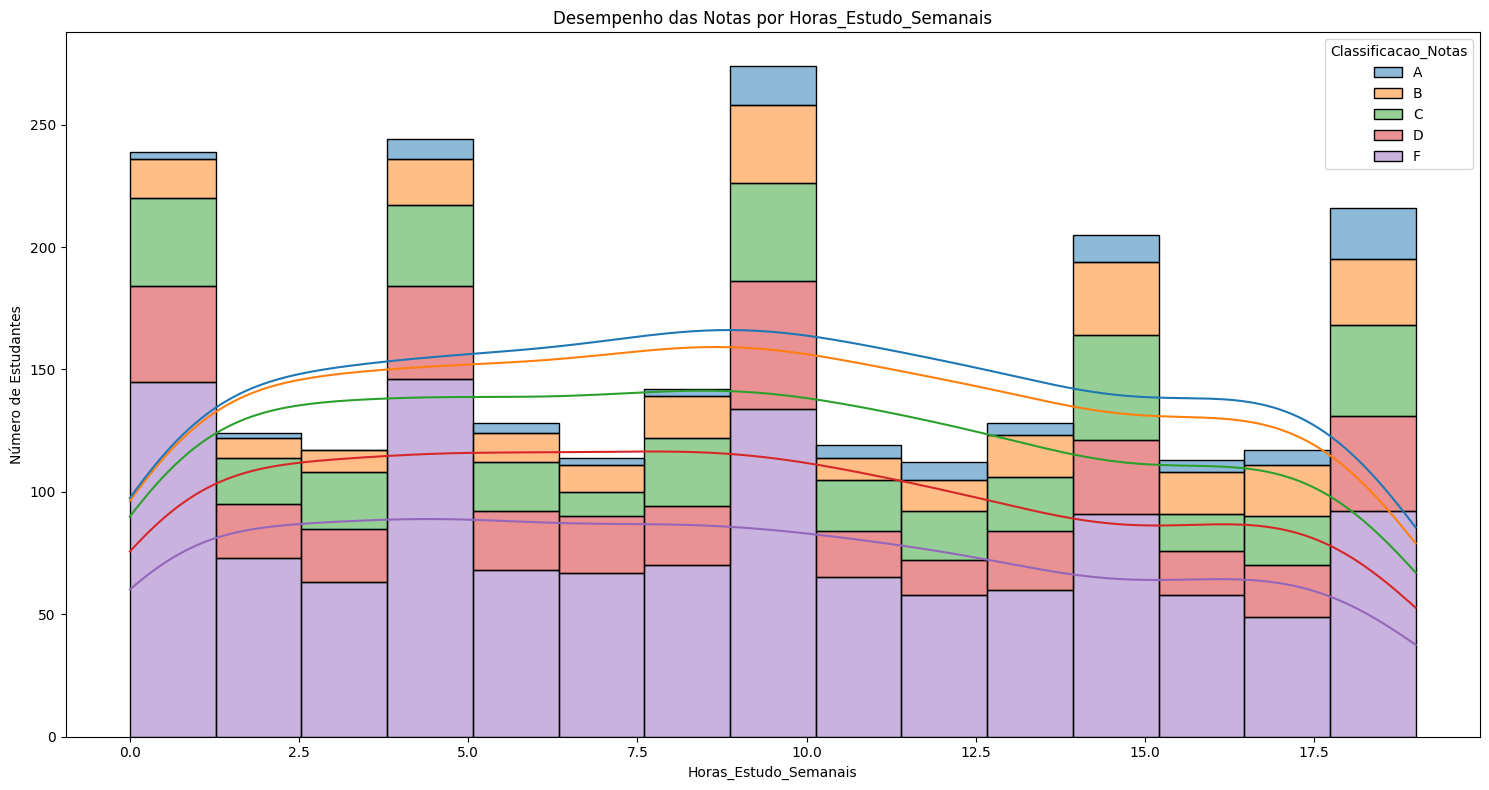

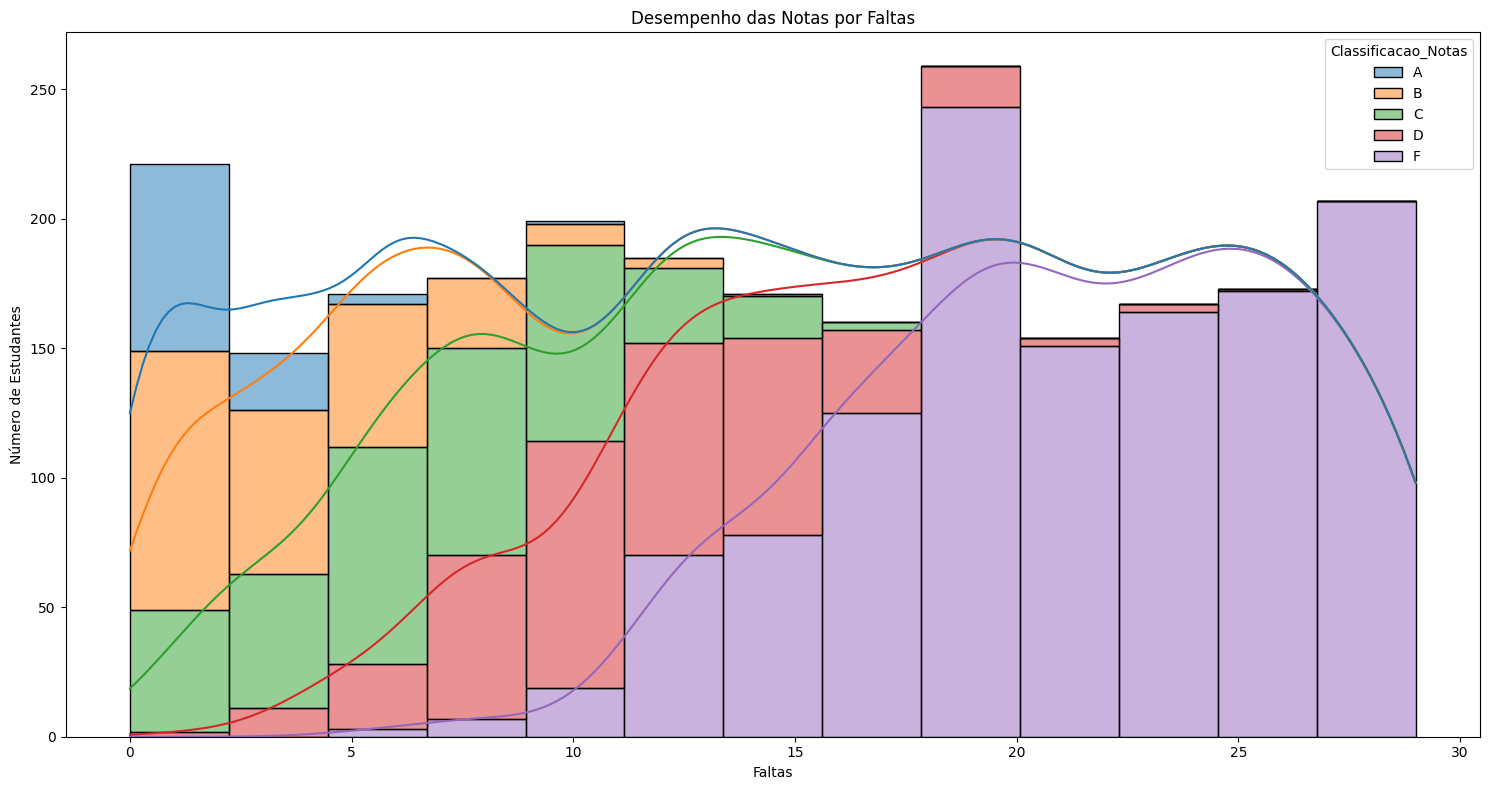

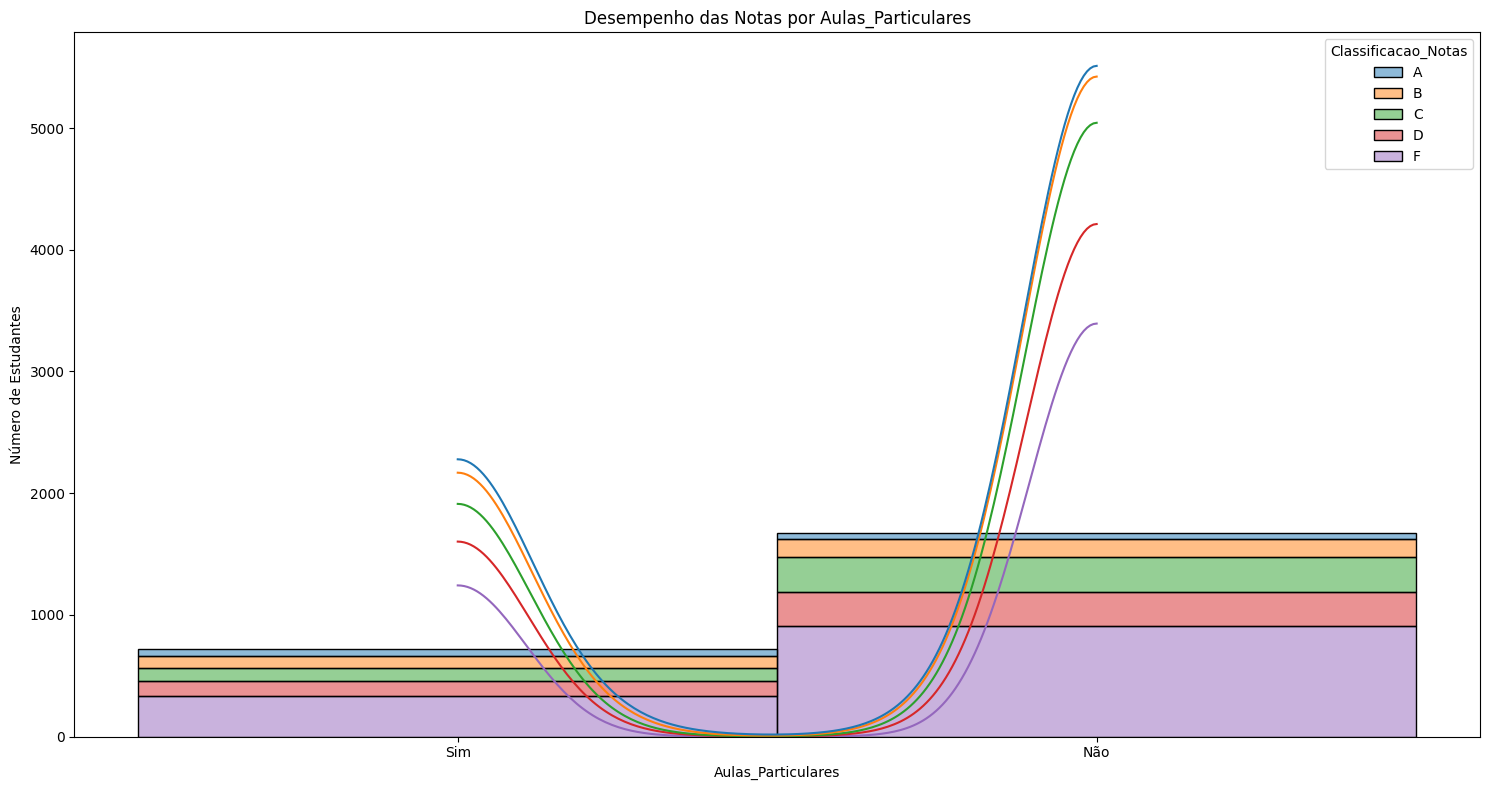

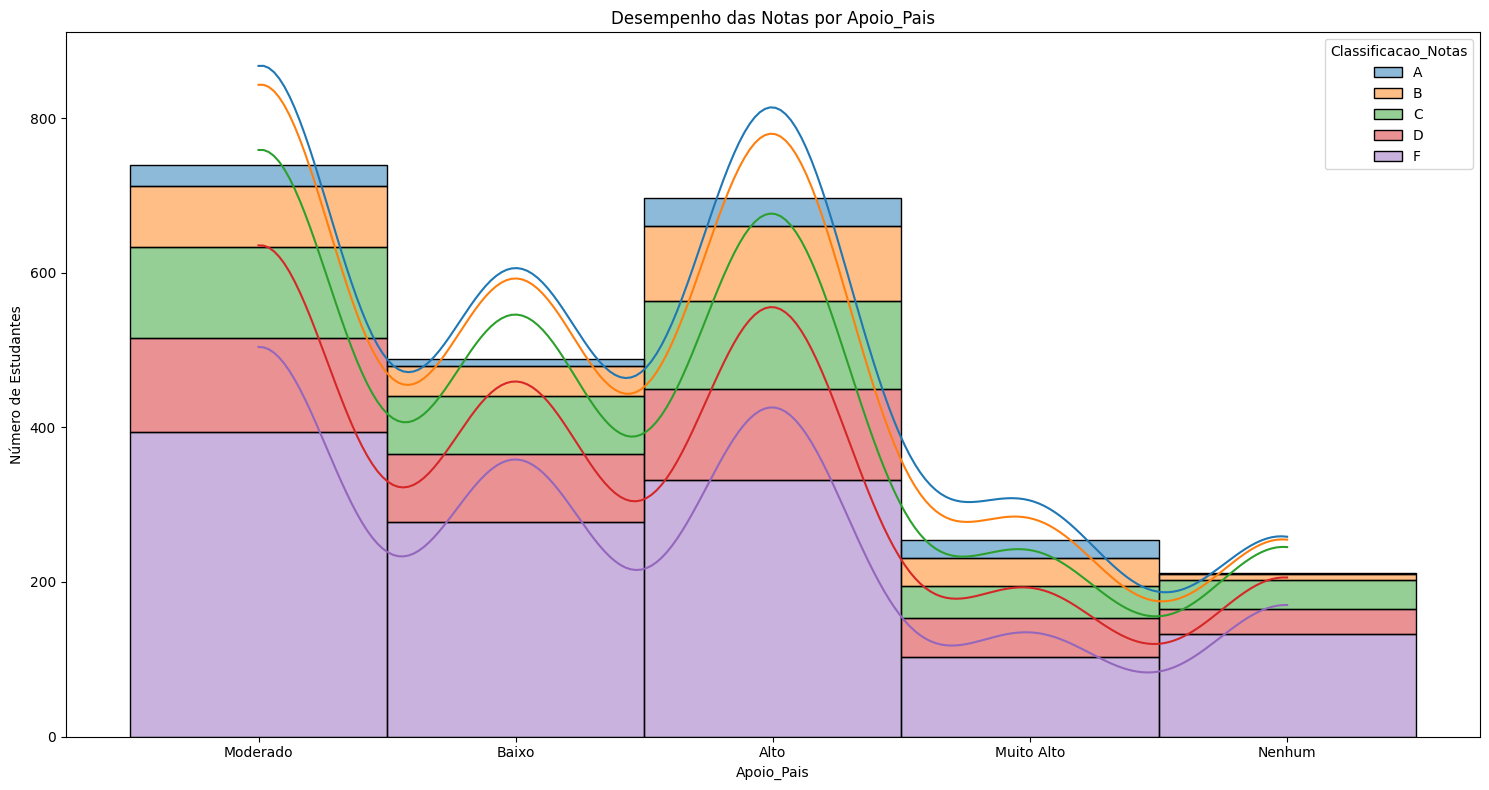

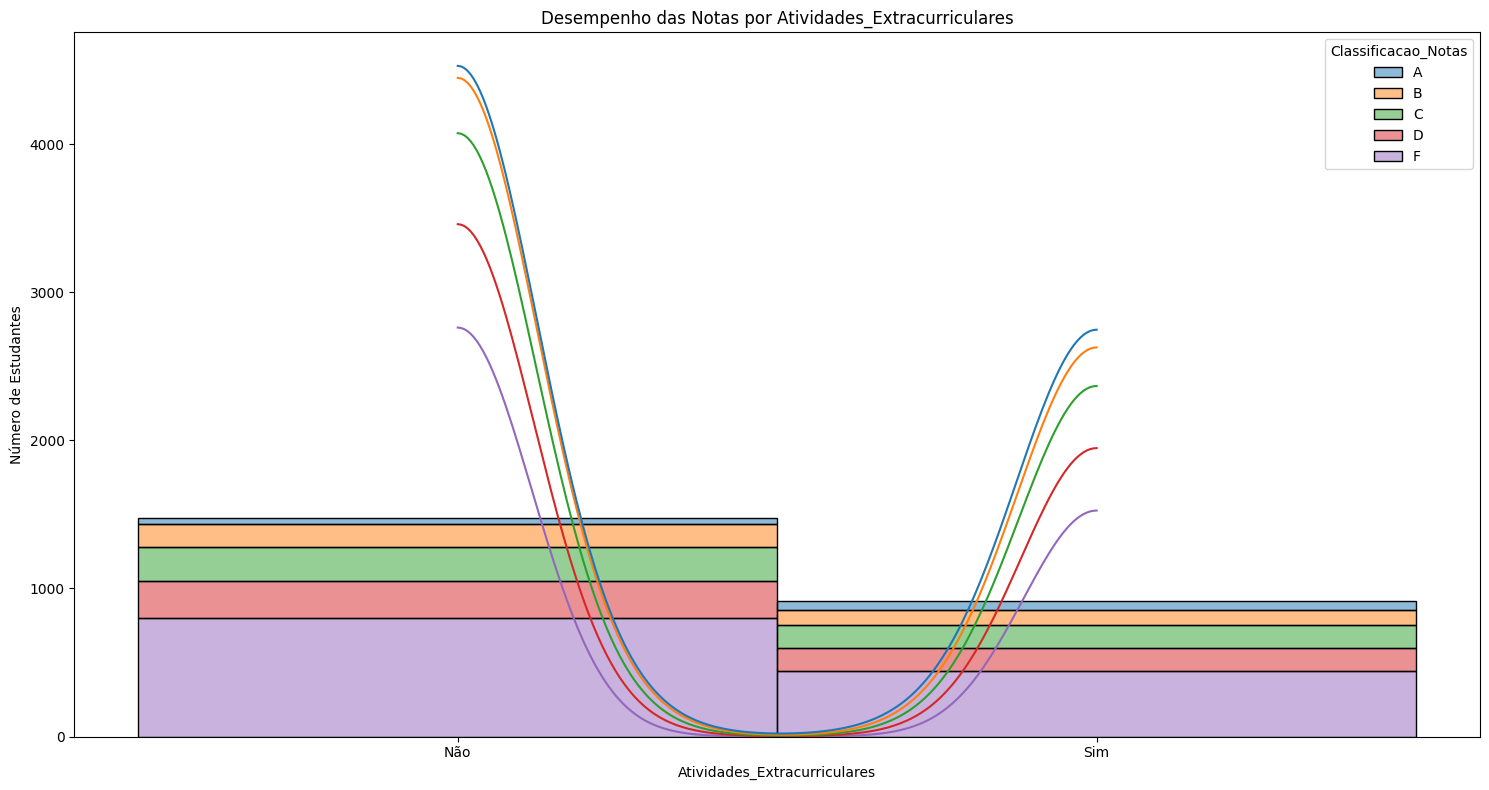

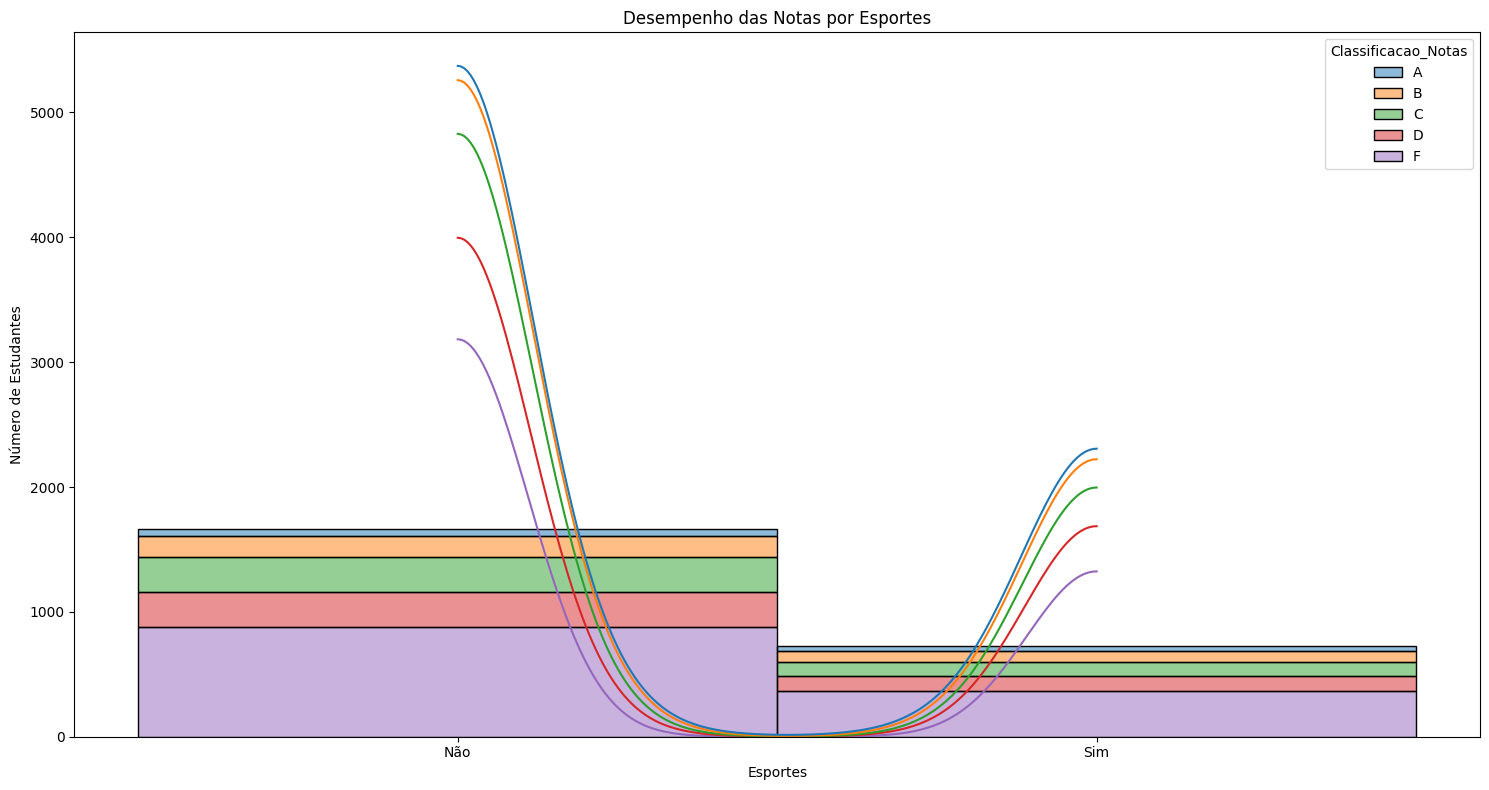

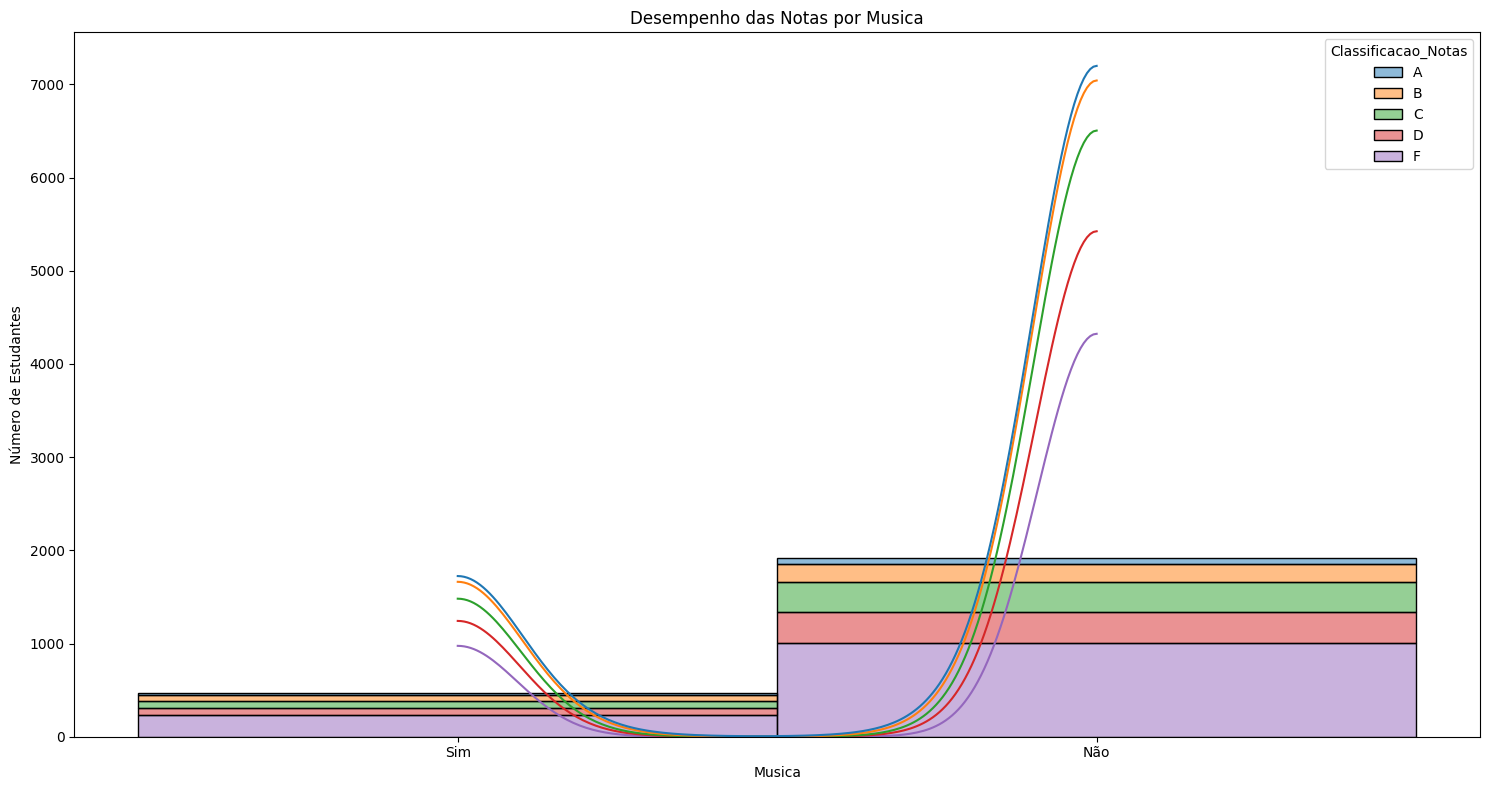

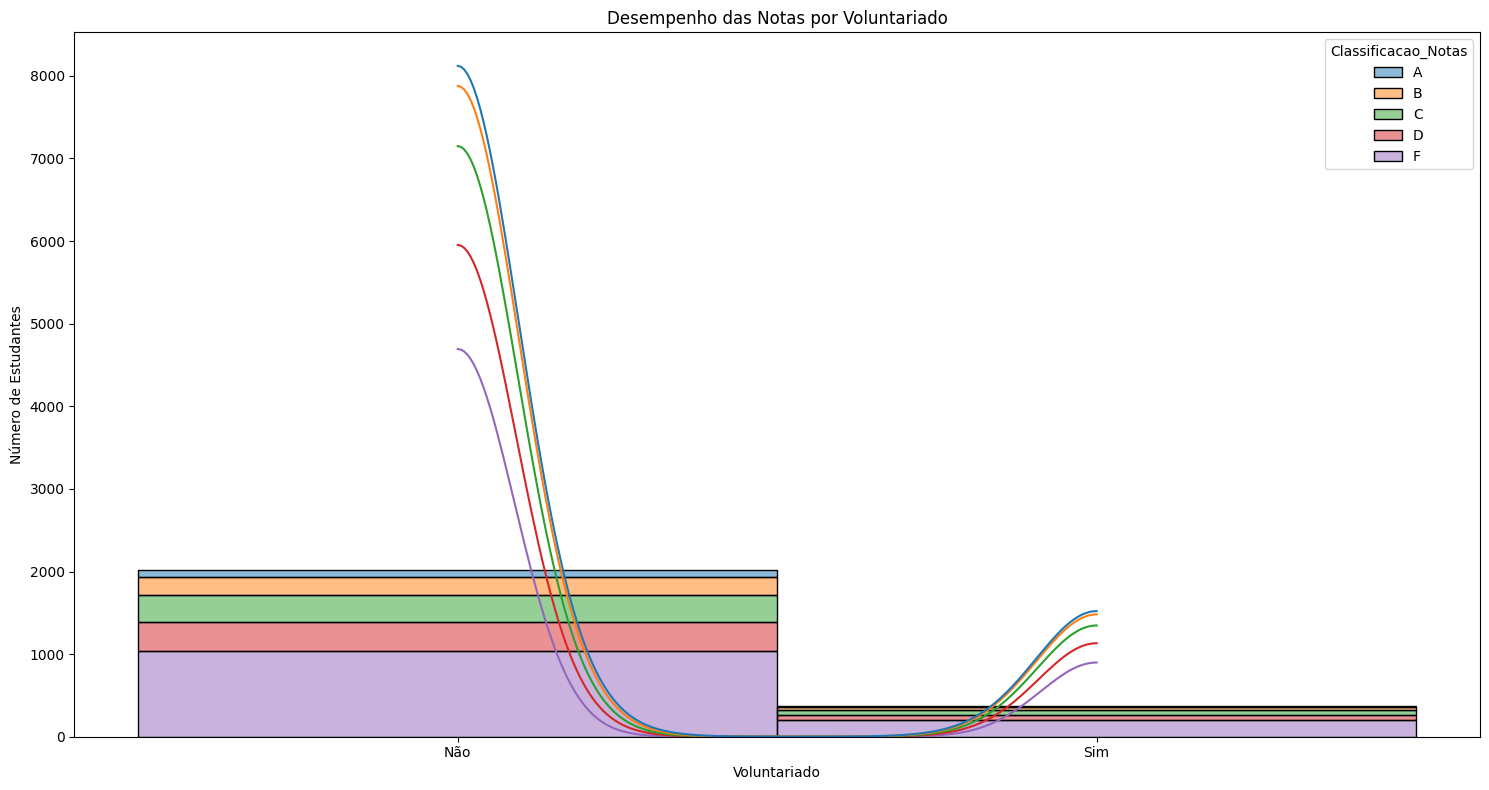

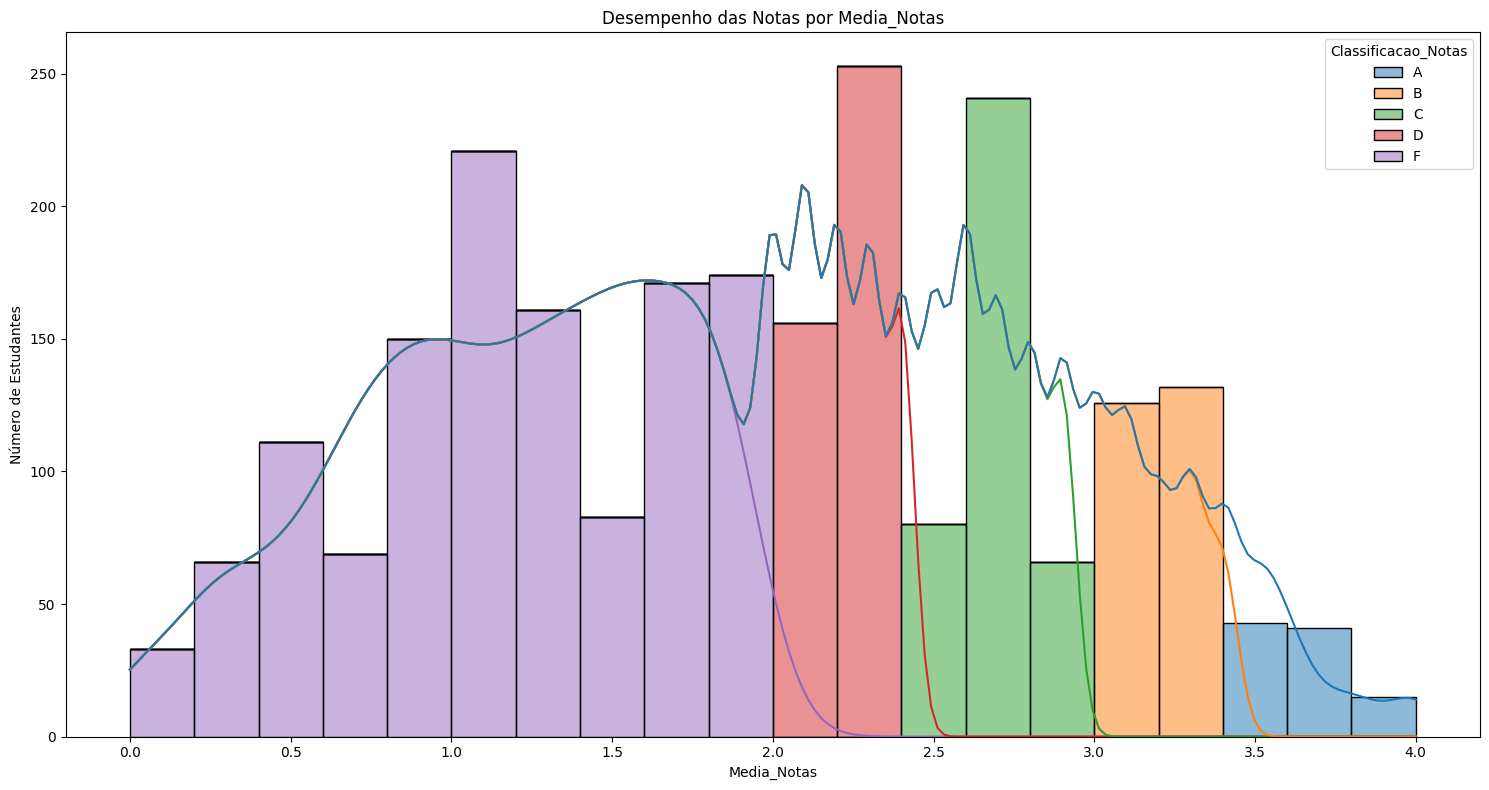

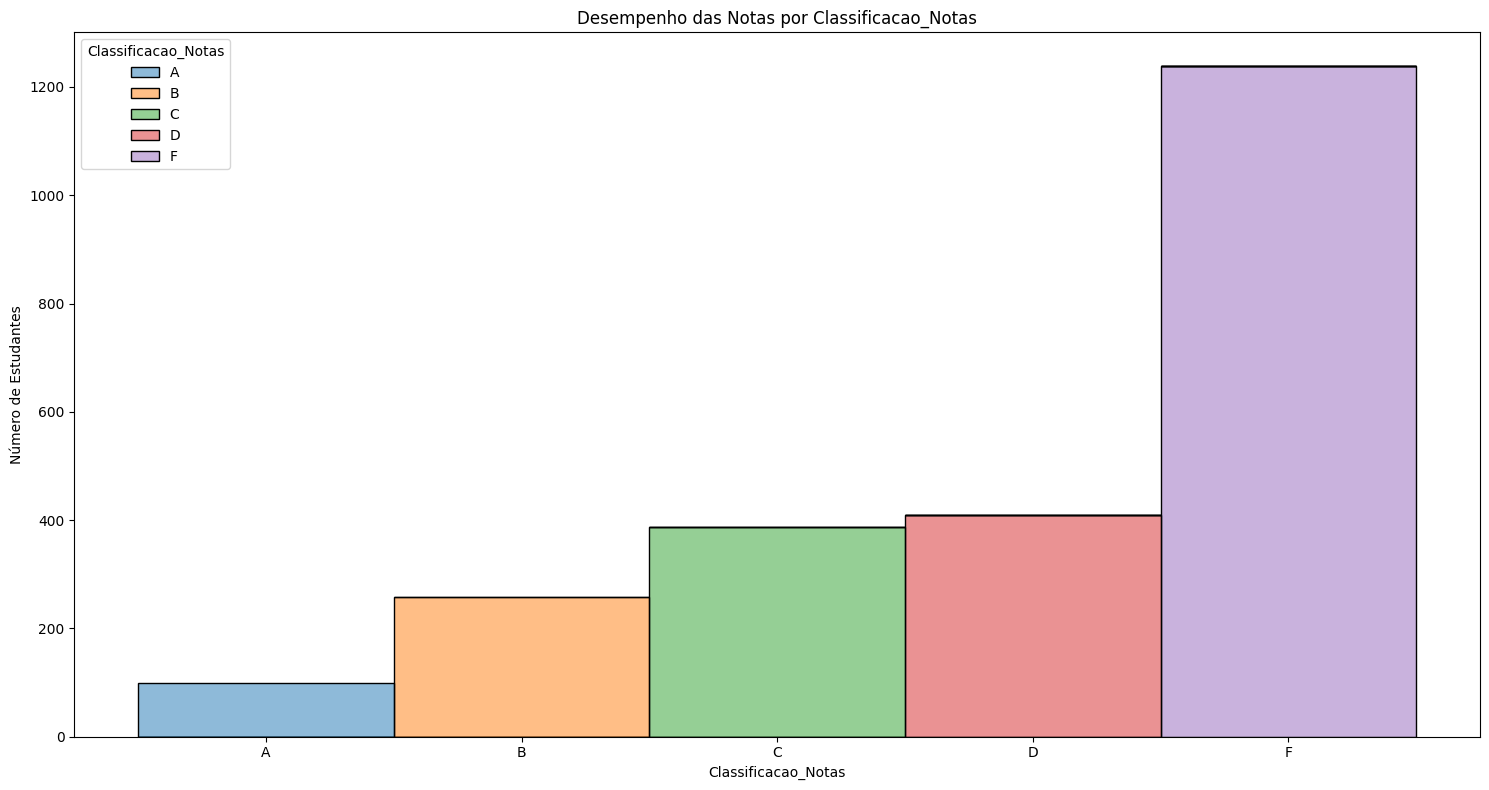

In [29]:
# Visualização e Análise do desempenho da classificação das notas (como as outras colunas do DataFrame impactam no 
# desempenho das notas)

# Criação dos Gráficos
for coluna in novo_df_estudantes.columns:
    # Configuração da figura
    plt.figure(figsize=(15, 8))

    # gráficos de histograma - Desempenho das Notas VS Variáveis
    sns.histplot(data=novo_df_estudantes, x=coluna, hue="Classificacao_Notas", kde=True, multiple="stack")
    plt.title("Desempenho das Notas por " + coluna)
    plt.xlabel(coluna)
    plt.ylabel('Número de Estudantes')
    
    plt.tight_layout()
    plt.show()



## **Insights Extraídos:** ##

Os fatores demográficos não influenciaram a classificação e a média dos estudantes de modo direto, os dados só mostram um certo contraste na diversidade dos grupos etnicos, que provavalmente são influenciados pelos níveis culturais e sócio-econômicos.

Os fatores acadêmicos não tiveram uma forte influência na classificação e na média dos estudantes, uma vez que a grande maioria dos estudantes não participaram de atividades extracurriculares, provavelmente por falta de interesse dos estudantes nestas atividades, isso com certeza impactou muito o desempenho da classificação e da média, num futuro pode-se criar um incentivo à pratica de tais atividades. 

Os fatores comportamentais tiveram uma influência muito siginificativa na classificacação e na média dos estudantes, sem dúvida as faltas, que segundo os dados, apesar dos alunos terem uma boa frequência nas aulas, as notas dos que faltam, por serem as mais baixas a nível de notas, impactaram muito o desempenho da classificação e da média de modo geral. Outro fator que também pode ter certa influência é o baixo número de participantes nas aulas particulares, que apesar das notas desse grupo não terem influenciado diretamente nas notas, mas impactaram a classificação e a média de modo geral. Já o que pode ter contribuído para melhores notas foram o apoio dos pais e as horas de estudos semanais desde que se mantenham entre 8 e 10 horas de estudos semanais.

---

6 - Análise Preditiva do Desempenho Acadêmico

---

In [30]:
# Criação de um novo dataframe para a análise preditiva
previsão_df_estudantes = novo_df_estudantes

# Sugestões de acordo com a visualização dos dados, para novas tomadas de decisões e assim melhorar
# o desempenho acadêmico:

# Alunos que estudam entre 8 e 10 horas alcançam notas maiores, abaixo de 8 e acima de 10 as notas tendem a cair
# -> Alunos devem estudar no mínimo 8 horas e no máximo 10 horas por semana
previsão_df_estudantes = previsão_df_estudantes[(previsão_df_estudantes["Horas_Estudo_Semanais"] >= 8) 
                                        & (previsão_df_estudantes["Horas_Estudo_Semanais"] <=10)]

# Alunos com mais de 6 faltas tem desempenho sofrível na classificação
# -> Melhorar a frequência dos alunos, criando um limite máximo de faltas que atingida ou extrapolada, 
# desclassifique o aluno
previsão_df_estudantes = previsão_df_estudantes[previsão_df_estudantes["Faltas"] <= 6]

# Em Aulas particulares o desempenho das notas foi bem pior para os estudantes que não participaram
# -> Incentivar os alunos a fazerem aulas particulares
previsão_df_estudantes = previsão_df_estudantes[previsão_df_estudantes["Aulas_Particulares"] == "Sim"]

# Apoio dos pais colabora para notas melhores
# -> Influenciar os pais a ajudarem os alunos nos estudos
previsão_df_estudantes = previsão_df_estudantes[(previsão_df_estudantes["Apoio_Pais"] != "Muito Alto") 
                                        & (previsão_df_estudantes["Apoio_Pais"] != "Nenhum")]

# Nova contagem preditiva
display(previsão_df_estudantes["Classificacao_Notas"].value_counts())

# Nova proporção preditiva
display(previsão_df_estudantes["Classificacao_Notas"].value_counts(normalize=True).map("{:.1%}".format))

# Prévia de como o dataframe ficaria com as novas sugestões
display(previsão_df_estudantes.head(7))


Classificacao_Notas
B    14
A     7
C     4
D     1
F     0
Name: count, dtype: int64

Classificacao_Notas
B    53.8%
A    26.9%
C    15.4%
D     3.8%
F     0.0%
Name: proportion, dtype: object

,Idade,Genero,Etnia,Escolaridade_Pais,Horas_Estudo_Semanais,Faltas,Aulas_Particulares,Apoio_Pais,Atividades_Extracurriculares,Esportes,Musica,Voluntariado,Media_Notas,Classificacao_Notas
92,16,Masculino,Caucasiano,Alguma Faculdade,9,1,Sim,Alto,Não,Não,Não,Não,3.6,A
110,18,Masculino,Afrodescendente,Ensino Médio,10,4,Sim,Alto,Não,Não,Não,Não,3.2,B
146,17,Feminino,Asiático,Alguma Faculdade,9,1,Sim,Moderado,Sim,Não,Não,Sim,3.6,A
324,16,Feminino,Afrodescendente,Alguma Faculdade,10,5,Sim,Baixo,Não,Sim,Não,Não,3.0,B
505,15,Masculino,Caucasiano,Alguma Faculdade,10,4,Sim,Moderado,Não,Sim,Não,Não,3.0,B
542,17,Masculino,Asiático,Nenhum,8,6,Sim,Alto,Sim,Não,Não,Não,3.2,B
554,15,Masculino,Afrodescendente,Graduação,10,4,Sim,Baixo,Não,Sim,Não,Não,3.0,B


---

Por último fizemos uma análise preditiva após a visualização como visto nos resultados acima.
 
Nós começamos o problema com um taxa de 51.7% de classificação na nota F e somente 4.0% para a nota A, o que nos mostra um desempenho sofrível na classificação das notas dos alunos. Com ajuda dos gráficos e as sugestões de ajustes para melhorar o desempenho acadêmico, conseguimos ajustar nosso dataframe e prever um percentual de 26.9% para a nota A, com a nota F excluída da classificação e conseguindo obter 53.8% para a nota B e a nota D ficando em 3.8%.

---

### **Resposta da Pergunta Norteadora**:  
**"Quais fatores demográficos, acadêmicos e comportamentais mais influenciam a classificação e a média de notas dos estudantes?"**

**Resposta:** 

De modo geral, a história contada através dos dados analisados de acordo com os insigths extraídos, deixa claro que as variáveis impactam diretamente a variável média das notas, esta por sua vez define o desempenho através da variável alvo classificação das notas. Os fatores comportamentais representados pelas variáveis faltas, apoio dos pais e horas de estudos semanais, são classificadas como as vilãs do mau desempenho acadêmico, sendo elas as que mais influenciaram na classificação das notas. Os fatores acadêmicos representados pelas variáveis música, esporte, voluntariado e atividades extracurriculares, apesar de não terem influenciado diretamente na classificação das notas, as mesmas devem ser dada uma atenção especial pelo baixíssimo número de participantes em todas essas atividades, possivelmente um maior número de alunos nessas atividades contribuiria para um aumento nas médias e até influenciar variáveis comportamentais como as faltas por exemplo, aumentando a frequência dos alunos. Os fatores demográficos representados pelas variáveis idade, gênero e etnia, apesar de irrelevantes para a classificação das notas, elas chamam atenção ao exibirem uma relação harmoniosa entre os alunos, evidenciando que o problema pode estar relacionado com a gestão do ensino público, a própria variável etnia alerta sobre a questão da inclusão social, que abrange até mesmo questões culturais e socioeconômicas.

---
## **Análise e Visualização de Dados concluídos!** ##
---

**📈 Análise de Dados**

**© 2025 - by Robson Silva - Programador Python e Analista de Dados.**

---